In [139]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [140]:
Kr,c,d,s,x1,m,dm,beta, Fe=sp.symbols("Kr,c,d,s,x,m,d_m,beta Fe")
R,C,ms=sp.symbols("R,C,m_s")
Fb, omega  = sp.symbols("Fb, omega ")

valeurs={d:0.0005, Kr:1/0.01, c:1, dm:0.0034, beta:1, R:10e6, C:30e-9, ms:0.0001, m:0.2, Fe:1}


# TP accélérometre

## Force exercée par le balour

Le système est composé d'un moteur avec une masse en rotation mal équilibrée.

Le moteur en tournant génère un force sinusoïdale (ou presque) de la forme suivante :


In [141]:

Fb= omega**2*d*dm
Fb

d*d_m*omega**2

## Equations du système suspendu avec le moteur

L'équation de la position du moteur fixé sur la plaque flexible est celle d'un système suspendu. On va garder $x$ comme variable, mais c'est bien l'angle qui change. Pour de petit mouvement, on peut approximer avec $x=\alpha l$.

In [142]:

Fr=-Kr*x1 # Force du ressort
Fc=-c*s*x1 # Force de frottement (air autour de la plaque)
eq=sp.Eq(Fe+Fr+Fc,m*x1*s*s) # Equation dans le domaine de Laplace
eq

Eq(Fe - Kr*x - c*s*x, m*s**2*x)

In [143]:
sol=sp.solve(eq,x1)
sol[0]

Fe/(Kr + c*s + m*s**2)

In [144]:
fmec=sp.sqrt(Kr/m).subs(valeurs)/2/np.pi
print(f"La fréquence propre du système est donnée par {fmec:.1f} [Hz]")

La fréquence propre du système est donnée par 3.6 [Hz]


## Mouvement du système pour une accélération donnée

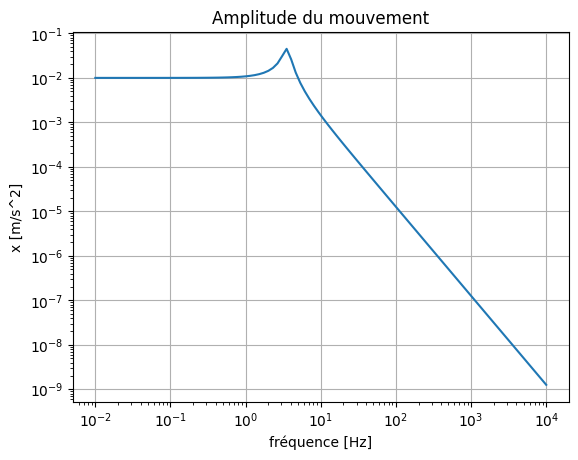

In [145]:
N=100;omegaMax=500

vOmega=np.logspace(-2, 4, N)*2*np.pi
va=np.zeros(N)
for i,om in enumerate(vOmega):
    va[i]=(float(np.abs(sol[0].subs(valeurs).subs(s,1j*om))))

plt.loglog(vOmega/(2*np.pi), va)
plt.title("Amplitude du mouvement")
plt.xlabel("fréquence [Hz]")
plt.ylabel("x [m/s^2]")
plt.grid()

In [146]:

Fr=-Kr*x1 # Force du ressort
Fc=-c*s*x1 # Force de frottement (air autour de la plaque)
eq=sp.Eq(Fb+Fr+Fc,m*x1*s*s) # Equation dans le domaine de Laplace
eq

Eq(-Kr*x - c*s*x + d*d_m*omega**2, m*s**2*x)

## Résolution du système pour x

La position $x$ peut être mise en évidence comme fonction de la vitesse $\omega$ du moteur :

In [147]:
sol=sp.solve(eq,x1)
x=sp.Lambda(omega,sol[0])
x

Lambda(omega, d*d_m*omega**2/(Kr + c*s + m*s**2))

L'accélération s'obtient assez facilement dans le domaine de Laplace en multipliant par $s^2$.

In [148]:
a=sp.Lambda(omega,x(omega)*s**2)
a

Lambda(omega, d*d_m*omega**2*s**2/(Kr + c*s + m*s**2))

## Equation du capteur piezo

Le capteur piezo a une relation donnée par

$$
Q=\beta \cdot F
$$

En dérivant, on trouve la relation pour le courant. Dans le domaine de Laplace, on a donc :

$$
i = \beta \cdot s \cdot F
$$

La force exercée sur le piezo est proportionnelle à l'accélération et à la masse sysmique du piezo. $F=m_S \cdot a$. Avec $a=s^2 x$ on obtient :

In [149]:
x0=sp.symbols("x")
i=beta * ms * x0 *s**3
i

beta*m_s*s**3*x

## Charge électrique du piezo (oscilloscope)

Le courant est injecté dans la capacité formée par le capteur et l'impédance de la sonde de l'oscilloscope. Ce dernier a une impédance résistive et capacitive. On peut négliger la valeur capacitive face à la capacité du capteur piezo. La résistance de la sonde est assez élevée ($R_{sonde}=10M\Omega$).

L'impédance est la mise en parallèle de ces composants :


In [150]:

Zc=1/(s*C)
Z=sp.simplify(Zc*R/(Zc+R))
Z

R/(C*R*s + 1)

## Tension mesurée par le piezo

La tension est sur l'impédance $Z$ ci-dessus est donnée par $U=Z \cdot i(\omega)$ et est donc dépendante de $a$ ou $x$ selon la relation

In [151]:

U=sp.Lambda(x0,i*Z)
U

Lambda(x, R*beta*m_s*s**3*x/(C*R*s + 1))

In [152]:
sp.simplify(U(x(omega)))

R*beta*d*d_m*m_s*omega**2*s**3/((C*R*s + 1)*(Kr + c*s + m*s**2))

# Graphiques

Pour quelques valeurs, on peut tracer des graphiques

## Variation de x avec la fréquence

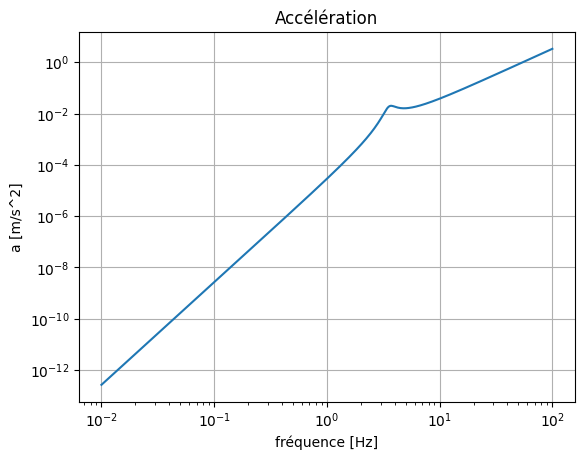

In [153]:

N=500;omegaMax=500
vOmega=np.logspace(-2, 2, N)*2*np.pi
va=np.zeros(N)
for i,om in enumerate(vOmega):
    va[i]=(float(np.abs(a(om).subs(valeurs).subs(s,1j*om))))

plt.loglog(vOmega/(2*np.pi), va)
plt.title("Accélération")
plt.xlabel("fréquence [Hz]")
plt.ylabel("a [m/s^2]")
plt.grid()

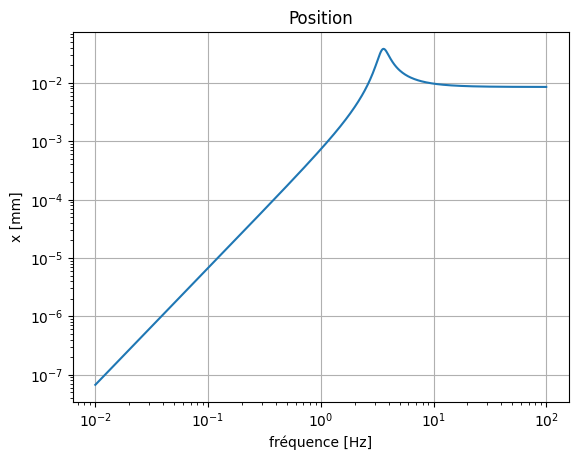

In [154]:
for i,om in enumerate(vOmega):
    va[i]=(float(np.abs(x(om).subs(valeurs).subs(s,1j*om))))

plt.loglog(vOmega/(2*np.pi), va*1000)
plt.title("Position")
plt.xlabel("fréquence [Hz]")
plt.ylabel("x [mm]")
plt.grid()

In [155]:
U(x(omega))

R*beta*d*d_m*m_s*omega**2*s**3/((C*R*s + 1)*(Kr + c*s + m*s**2))

In [156]:
om=3.6*2*3.14
x(om).subs(valeurs).subs(s,1j*om)
(np.abs(U(x(om)).subs(valeurs).subs(s,1j*om).subs(omega,om)))
# U(x(om))

64.4692037179703

In [157]:
np.abs(U(x(omega))).subs(valeurs).subs(s,1j*omega)

0.0017*Abs(omega**5/((0.3*I*omega + 1)*(-0.2*omega**2 + 1.0*I*omega + 100.0)))

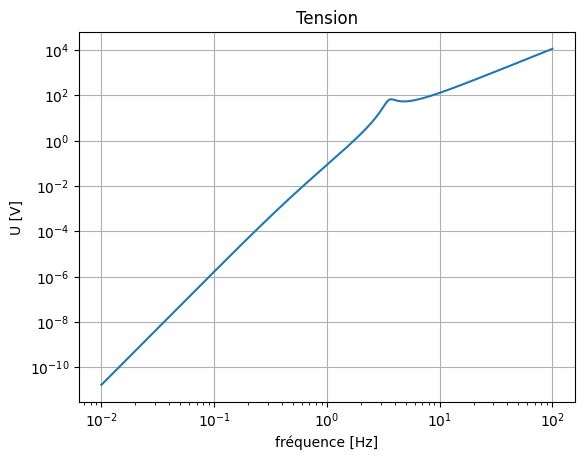

In [158]:
vU=np.zeros(N)
for i,om in enumerate(vOmega):
    vU[i]=(float(np.abs(U(x(omega)).subs(valeurs).subs(s,1j*omega).subs(omega,om))))

plt.loglog(vOmega/(2*np.pi), vU)
plt.title("Tension")
plt.xlabel("fréquence [Hz]")
plt.ylabel("U [V]")
plt.grid()

In [159]:
# Evaluation de la masse balour

d=0.02
e=0.01
rho=2700
mb=d**2/np.pi*e*rho
mb

0.0034377467707849396

In [160]:
# Tension à la fréquence de coupure du circuit RC
# U = beta * ms * x0 * w^3 * R / (RCw + 1)
R=10e6
C=30e-9
f0=1/(2*np.pi* R*C)
print(f"Resonnance du circuit de l'oscilloscope f0={f0:.1f} [Hz]")
w0=2*np.pi*f0
U0=U(x(w0)).subs(s,1j*w0).subs(valeurs)
print(f"Tension à la fréquence de résonnance U={np.abs(U0)*1000:.1f} [mV]")
U

Resonnance du circuit de l'oscilloscope f0=0.5 [Hz]
Tension à la fréquence de résonnance U=5.1 [mV]


Lambda(x, R*beta*m_s*s**3*x/(C*R*s + 1))

In [161]:
print(f"Resonnance du système mécanique f_mec={fmec:.1f} [Hz]")
wmec=2*np.pi*fmec
U0=U(x(wmec)).subs(s,1j*wmec).subs(valeurs)
print(f"Tension à la fréquence de résonnance U={np.abs(U0):.1f} [V]")

Resonnance du système mécanique f_mec=3.6 [Hz]
Tension à la fréquence de résonnance U=62.7 [V]


In [162]:
U(x(omega))

R*beta*d*d_m*m_s*omega**2*s**3/((C*R*s + 1)*(Kr + c*s + m*s**2))